# Part I - (Ford GoBike Exploration)
## by Mubarak Agboola

## Table of content
* Introduction
* Preliminary Wrangling
* Univariate Exploration
* Bivariate Exploration
* Multivariate Exploration

## Introduction

### Investigation description
For the purposes of our inquiry, we will examine the data for Ford's GoBike program provided by Ford.We'll look at questions and insights that visualization can help us understand.

### Dataset Description
This dataset, known as the 2017 Ford GoBike Dataset, contains details about each ride taken through a bike sharing program serving the greater San Francisco area. This dataset includes 519,700 trips with 13 features.

The dataset provided to us by Ford include the following fields:

 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)

## Preliminary Wrangling


In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
#load the dataset into a dataframe
data = pd.read_csv("2017-fordgobike-tripdata.csv")

In [13]:
#check shape of data
data.shape

(519700, 13)

In [14]:
#check top 3 samples of data
data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer


In [15]:
#check info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [16]:
# Check values for user type data
cat = data.select_dtypes(include=['object']).columns.tolist() #assign all categorical features to a variable 

print(data.user_type.value_counts())
cat

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64


['start_time',
 'end_time',
 'start_station_name',
 'end_station_name',
 'user_type']

#### Observation after Assessing data

> - some datatypes are not right(datetime and IDs), they need to be fixed
- there are also some missing data which is not compulsory to be dealt with

In [17]:
# Use pd.to_datetime to convert datatype to datetime
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)

# Use astype(str) to convert datatype to str
data.start_station_id = data.start_station_id.astype(str)
data.end_station_id = data.end_station_id.astype(str)
data.bike_id = data.bike_id.astype(str)

### What is the structure of your dataset?

> the data has 183,412 samples and 16 features

### What is/are the main feature(s) of interest in your dataset?

> Stations name (start and end),
> Time (start and end),
> user type,
> gender and age of user.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Stations name (start and end),
> Time (start and end),
> user type,
> gender and age of user.

## Univariate Exploration

> In this section,  I will investigate distributions of individual variables. 




#### What is the proportion of the user types?

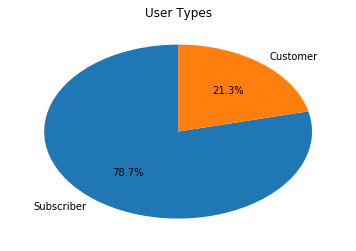

In [18]:
#Ratio of type of users
user_type = data['user_type'].value_counts()/data['user_type'].value_counts().sum()
plt.pie(user_type, labels = user_type.index, autopct='%1.1f%%', startangle = 90)
plt.title('User Types');

Observation: As expected, 79% of the users are members(subscribers) and about 21% are casuals(customer)

<b>What are the top five starting points in the dataset?<b>

In [30]:
#function for visualization
def countplot(df, feat, clr, odr, xlabel, ylabel, title):
    sb.countplot(data=df, y=feat, color=clr, order=odr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

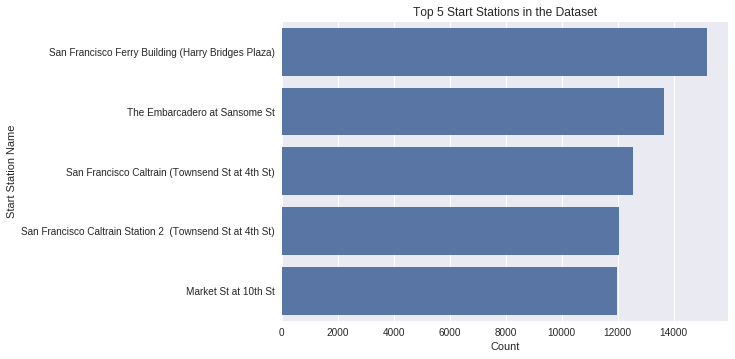

In [32]:
#check top 5 start station in dataset
st_stat_counts = data['start_station_name'].value_counts().head(5)
st_stat_order = st_stat_counts.index
base_color = sb.color_palette()[0]
countplot(data, 'start_station_name', base_color, st_stat_order, 
          'Count','Start Station Name','Top 5 Start Stations in the Dataset')


Observation : the most frequent start station in San Fransico for trips  is the "San Fransico Ferry Building"  with a total of approximately 14000 trips

<b> What is the busiest hour of trips?</b>

In [20]:
#function for visualization
def histo(x, title, xlabel, ylabel):
    plt.hist(x,rwidth=.8, bins = 24)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

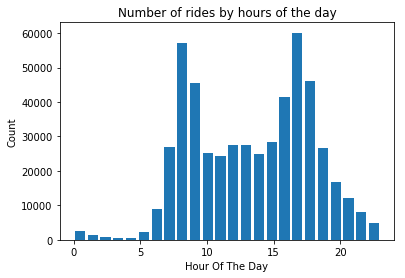

In [21]:
#Distribution of number of rides by hours of the day
st = data['start_time'].dt.hour
histo(st,'Number of rides by hours of the day','Hour Of The Day','Count')

In [22]:
#extracting data permanently into the dataset
data["hour"]=data['start_time'].dt.hour
data["month"]=data['start_time'].dt.month
data['day'] = data['start_time'].dt.dayofweek

Observation: The two-peak shape of the distribution was predicted. Both of these peaks occur throughout the typical workday and evening rush periods. The first time between 7 and 9 a.m., when most people are on their way to work. The second busiest time of day is from 4 to 6 p.m., when workers are beginning to leave the office.

<b>What is the busiest months of trips?</b>

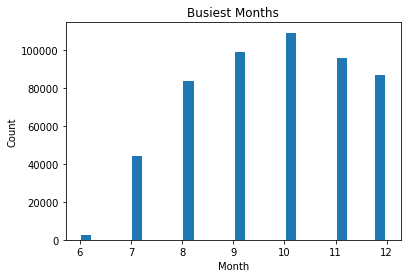

In [23]:
#Distribution of rides per months
mth = data['start_time'].dt.month
histo(mth,'Busiest Months','Month','Count')

Observation: Data distribution suggests that October and September are the busiest months. There, May and June have been the months with the fewest occurrences.

<b>What are the top five ride end stations?</b>

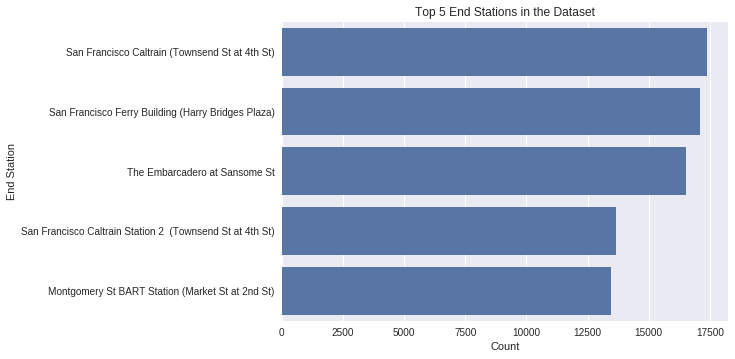

In [31]:
#check top 5 end station in dataset
end_stat_counts = data['end_station_name'].value_counts().head(5)
end_stat_order = end_stat_counts.index
countplot(data, 'end_station_name', base_color, end_stat_order, 
          'Count','End Station','Top 5 End Stations in the Dataset')


Obeservation: As expected, the majority of the end stations also serve as the starting point for rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I extracted hour and day information from the "start_time" feature to create a visualizer to understand the distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I converted the "start_time" feature to a datetime datatype to be able to extract hours, day and month

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in this
data. 

<b>What is the average duration of ride trips per month?</b>

In [44]:
#function for visualization
def pointplot(df, featX, featY, xlabel, ylabel, title, h=None):
    sb.pointplot(data=df,x=featX,y=featY, hue=h)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize = 18)
    plt.style.use('seaborn')


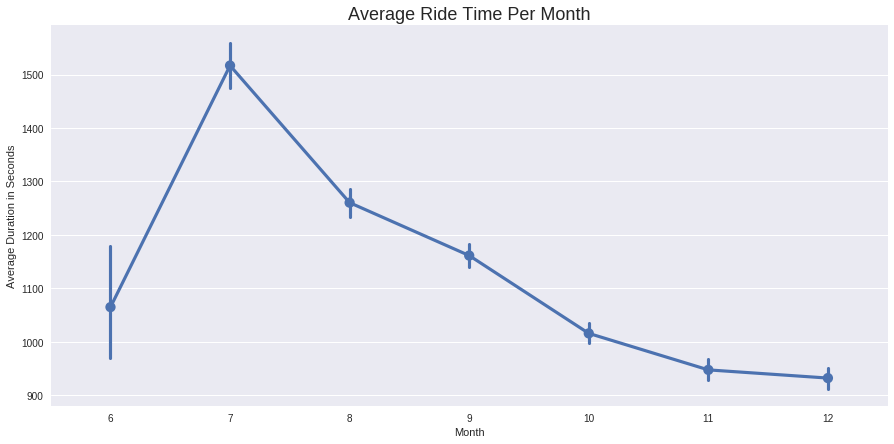

In [41]:
#Visualizing the data in a point plot
plt.figure(figsize = (15, 7))

dt = data.sort_values(by="month")
pointplot(dt,"month","duration_sec",'Month', 
          'Average Duration in Seconds','Average Ride Time Per Month')

Observation: The average length of a trip appears to be longest in July, with December having the shortest trips.

<b>How long did people ride bikes from the five most frequently visited stations?</b>

In [26]:
#Finding the most popular departure points and creating a dataframe based on them.
top_starts = data['start_station_name'].value_counts().index[:5]
data_stations = data.loc[data['start_station_name'].isin(top_starts)]

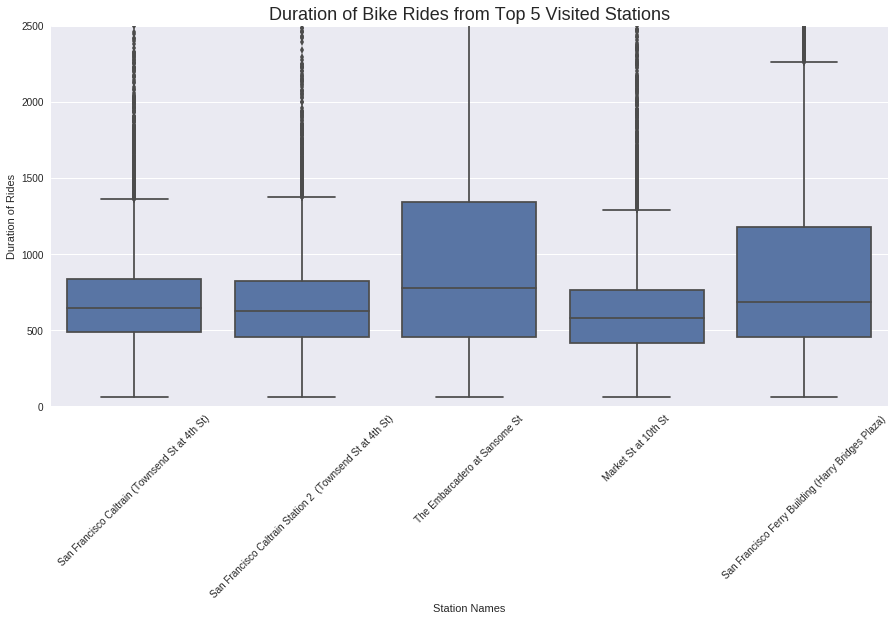

In [38]:
#Visualizing the data in a boxplot
plt.figure(figsize = (15,7))
sb.boxplot(data = data_stations, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 2500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.style.use('seaborn')

Observation: "The Embarcadero at Sansome St." has the longest average ride duration.

<b>Do people take longer rides on certain days of the week?</b>

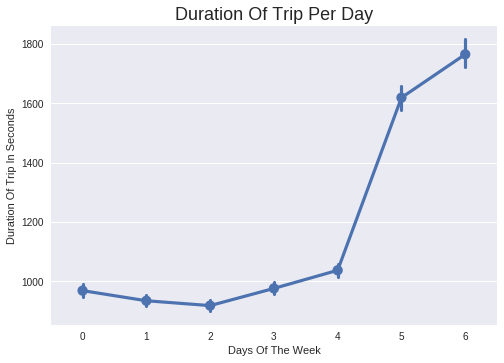

In [45]:
#Distribution of duration trips per day
pointplot(data,"day","duration_sec","Days Of The Week", "Duration Of Trip In Seconds","Duration Of Trip Per Day")

Observation: According to the graphic, rides last the longest on weekends.

<b>Is there relationship beween the longer duration of rides and customer type?</b>

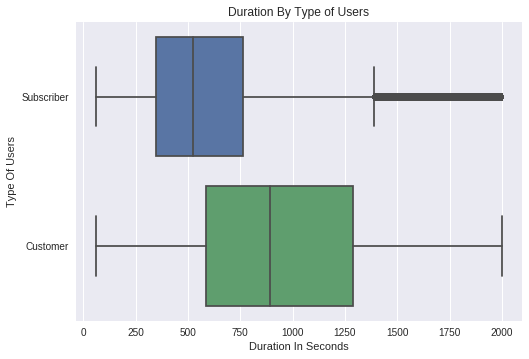

In [19]:
#Distribution of the duration by users
long = data[data['duration_sec'] < 2000]
sb.boxplot(data =long , y='user_type', x='duration_sec')
plt.title('Duration By Type of Users')
plt.xlabel('Duration In Seconds')
plt.ylabel('Type Of Users');

Observation: According to the data, ordinary customers have lengthier rides  than subscribers do on average.

<b>Is there a specific time of day when people take longer rides?</b>

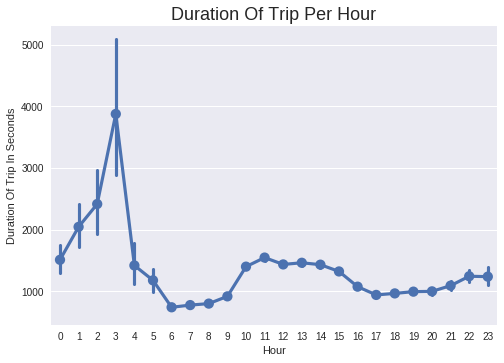

In [43]:
#Distribution of duration trips per day
pointplot(data,"hour","duration_sec","Hour", "Duration Of Trip In Seconds","Duration Of Trip Per Hour")

Observation: People frequently ride longer around midnight.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Non-subscribers typically have lengthier rides than those subscribers.
> * Rides take longer on weekends
> * longer trips were within june and july
  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> despite the peak rider activity at 7am-9am and 4pm-6pm, midnight trips were shown to be the longest.

## Multivariate Exploration

> I will create plots of three or more variables to investigate the data even
further

<b>Exists a connection between the type of users, the length of rides, and the days of the week when they occur?</b>

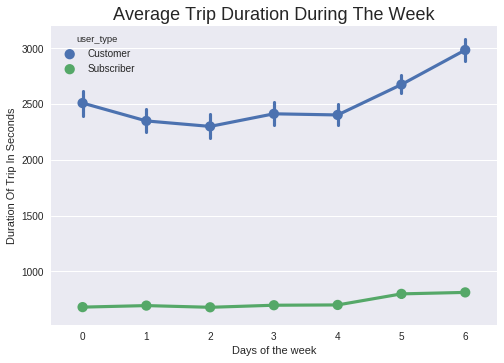

In [47]:
#Distribution of duration for a trip by days and user types
pointplot(data,"day","duration_sec","Days of the week", "Duration Of Trip In Seconds",
          'Average Trip Duration During The Week',"user_type")


Observation: We had noted that subscribers take longer rides than ordinary consumers do, however the graph above demonstrates that both groups of users take longer rides on weekends.

<b>Is there a connection between the type of users, the length of rides, and Months when they occur?</b>

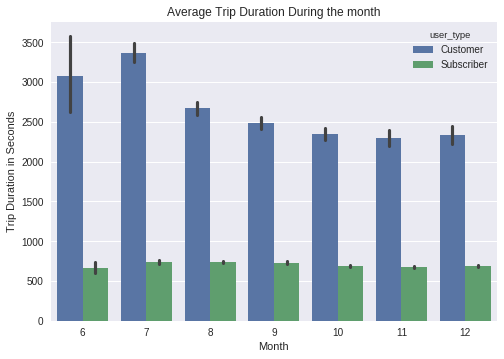

In [22]:
#Distribution of duration for a trip by days and user types
ax = sb.barplot(data=data, x='month' , y='duration_sec', hue='user_type')
plt.xlabel('Month')
plt.ylabel('Trip Duration in Seconds')
plt.title('Average Trip Duration During the month');

Observation: In June and July, casuals (regular customers) take longer rides, although the portfolio of rides for subscribers is somewhat even.

<b>How long did different types of users spend riding bikes from the five most popular stations?</b>

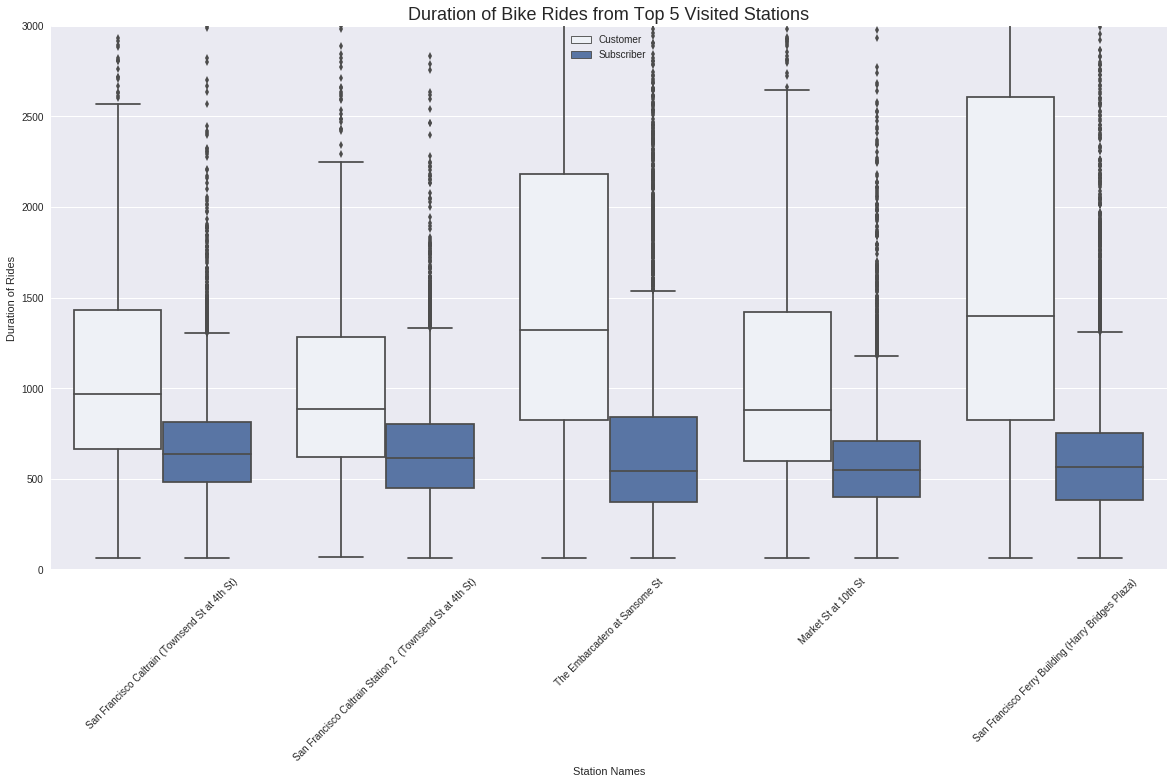

In [23]:
#Visualizing the data in a boxplot
base_color = sb.color_palette()[0]
plt.figure(figsize = (20,10))
sb.boxplot(data = data_stations, x = 'start_station_name', y = 'duration_sec',hue = "user_type" ,color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 3000);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names');
plt.ylabel('Duration of Rides')
plt.legend(loc='upper center')
plt.style.use('seaborn')

Observation: Both categories of clients rode farther when their starting point was "The Embarcadero at Sansome ST".

<b>What categories of users make up the top 5 frequent riders, and how long are their trips?</b>

In [49]:
#Finding the most frequent riders.
top_riders = data['bike_id'].value_counts().index[:5]
data_riders = data.loc[data['bike_id'].isin(top_riders)]

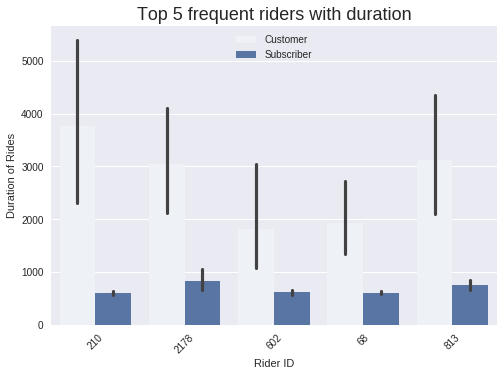

In [29]:
#Distribution of duration for a trip by days and user types
sb.barplot(data = data_riders, x = 'bike_id', y = 'duration_sec',hue = "user_type" ,color = base_color);
plt.xticks(rotation = 45);
plt.title('Top 5 frequent riders with duration', fontsize = 18);
plt.xlabel('Rider ID');
plt.ylabel('Duration of Rides')
plt.legend(loc='upper center')
plt.style.use('seaborn')

Observation: Before becoming a subscriber, the average rider rides for longer as a casual rider.

<b>What time of day do these riders go on their trips?</b>

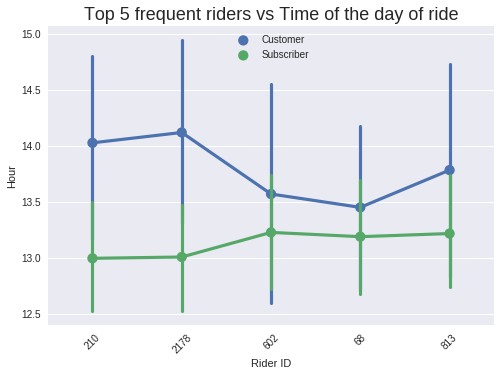

In [50]:
#Distribution of duration for a trip by days and user types
pointplot(data_riders,"bike_id","hour","Rider ID", "Hour",
          'Top 5 frequent riders vs Time of the day of ride',"user_type")
plt.xticks(rotation = 45);
plt.legend(loc='upper center')
plt.style.use('seaborn')

Observation: Whether they are casual or regular riders, most of the top 5 riders ride in the afternoon.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  * both groups of users take longer rides on weekends.
>  * In June and July, regular customers (called "casuals") go on longer rides, while subscribers' rides are more or less the same length.

### Were there any interesting or surprising interactions between features?

> * Both categories for users rode longer when their starting station is "The Embarcadero at Sansome ST"
> * Before becoming a subscriber, the average rider rides for a longer period of time as a casual.

## Conclusions
>  The majority of users are, unsurprisingly, paying members; what's more intriguing is that both casual consumers and summertime riders tend to log lengthier rides. We also found that the busiest times for trips were between 7 AM and 9 AM and again between 4 PM and 6 PM, when most people are on their way to and from work. We also found that weekend travels tend to be longer than weekday ones. Likewise, the majority of the longest rides occurred at midnight.
